In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML
import master_read as m
import efit_plots as e
import os
import sys

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['animation.html'] = 'html5'

In [3]:
eqdsk_file = "/users/giannis_kx/eqdsks/eqdsk_9MA_SS.Gpolevoa"

In [4]:
def eqdsk_info():
    """Extracts parameters from the eqdsk file."""
    global a
    sys.stdout = open(os.devnull, 'w')
    m.read_geqdsk(eqdsk_file)
    m.struct_hor_ax_det()
    e.gridsNunits()
    e.intersections()
    sys.stdout = sys.__stdout__

In [5]:
#eqdsk_info()

In [3]:
filepath = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/db_tear/dt2.scratch./"

In [4]:
pxr.pixieload(filepath + "pixie3d.h5")

timesteps= 205
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Ti+Te', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [7]:
rho_0 = pxr.load_array(0,13,0,1)
rho_100 = pxr.load_array(0,13,100,101)
rho_125 = pxr.load_array(0,13,125,126)
rho_150 = pxr.load_array(0,13,150,151)
rho_end = pxr.load_array(0,13,203,204)

In [11]:
rho_0t = np.mean(rho_0,axis=2)
rho_100t = np.mean(rho_100,axis=2)
rho_125t = np.mean(rho_125,axis=2)
rho_150t = np.mean(rho_150,axis=2)
rho_endt = np.mean(rho_end,axis=2)

In [10]:
Prs_0 = pxr.load_array(0,6,0,1)
Prs_100 = pxr.load_array(0,6,100,101)
Prs_125 = pxr.load_array(0,6,125,126)
Prs_150 = pxr.load_array(0,6,150,151)
Prs_end = pxr.load_array(0,6,203,204)

In [12]:
Prs_0t = np.mean(Prs_0,axis=2)
Prs_100t = np.mean(Prs_100,axis=2)
Prs_125t = np.mean(Prs_125,axis=2)
Prs_150t = np.mean(Prs_150,axis=2)
Prs_endt = np.mean(Prs_end,axis=2)

In [14]:
T_0 = pxr.load_array(3,5,0,1)
T_0t = np.mean(T_0,axis=2)

In [15]:
Pressure = np.multiply(rho_0t,T_0t)

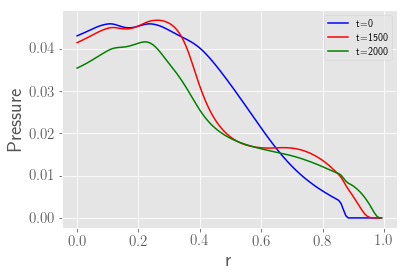

In [28]:
plt.plot([x/Prs_0.shape[0] for x in range(Prs_0.shape[0])], Prs_0t[:,0,0],"b",label="t=0")
plt.plot([x/Prs_0.shape[0] for x in range(Prs_0.shape[0])], Prs_150t[:,0,0],"r",label="t=1500")
plt.plot([x/Prs_0.shape[0] for x in range(Prs_0.shape[0])], Prs_endt[:,0,0],"g",label="t=2000")
plt.legend()
plt.xlabel("r")
plt.ylabel("Pressure")
plt.show()

In [9]:
Prs.shape

(129, 65, 33, 1)

In [8]:
psi_pol = pxr.load_array(3,4,0,1)

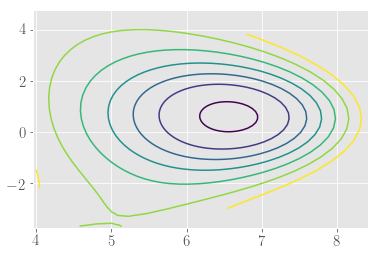

In [11]:
plt.contour(pxr.X[:,:,0]*e.a,pxr.Z[:,:,0]*e.a,psi_pol[:,:,0,0])

In [10]:
e.a = 2.18095

In [17]:
start_point = pxr.X[0,0,0]*e.a

In [13]:
(pxr.X.shape[0]-1)*0.8
print("Range:",pxr.X[102,0,0]*e.a)

Range: 7.96195374486


In [15]:
FTLE_Resolution = (pxr.X[102,0,0]-pxr.X[0,0,0])*e.a/400
print("Resolution:",FTLE_Resolution)

Resolution: 0.00443081291182


In [16]:
CNC_Resolution = (pxr.X[-1,0,0]-pxr.X[0,0,0])*e.a/100
print("CNC_Resolution:",CNC_Resolution)

CNC_Resolution: 0.0222234289512


In [8]:
# Data loading
Te = pxr.load_array(0,6,0,204)
psi_pol = pxr.load_array(3,4,0,1)

# Toroidal averaging
psi_pol_n0 = np.mean(psi_pol,axis=2)
Te_n0 = np.mean(Te,axis=2)

# Extracting magnetic axis and peak temperature
MA = np.unravel_index(np.argmin(psi_pol_n0[:,:,0]),(psi_pol.shape[0],psi_pol.shape[1]))
Tpeak = Te_n0[MA[0],MA[1],0]
Tnorm = 1/Tpeak

In [12]:
dTe = Te-Te_n0[:,:,np.newaxis,:]

In [9]:
# Bug fix for animating contour plots    
def setvisible(self,vis):
    for c in self.collections: c.set_visible(vis)
def setanimated(self,ani):
    for c in self.collections: c.set_animated(ani)

In [10]:
eqdsk_info()

In [11]:
# Extract the separatrix
r_sep = [x for x in m.DS.rbbbs]
z_sep = [x for x in m.DS.zbbbs]

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


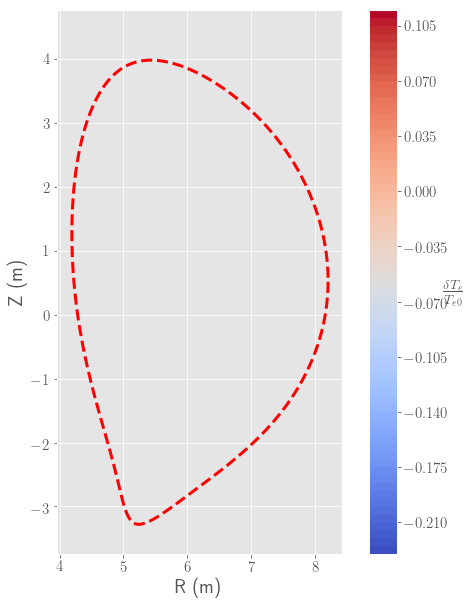

In [13]:
# Animation
fig = plt.figure(figsize=(10,10))
plt.plot(r_sep,z_sep,color='red',linewidth=3,linestyle='--')
plt.axes().set_aspect("equal")
plt.xlabel("R (m)")
plt.ylabel("Z (m)")

ims = []
for i in range(204):
    #im = plt.contourf(pxr.X[:,:,0]*e.a,pxr.Z[:,:,0]*e.a,np.log10(Te[:,:,0,i]*Tnorm),80,cmap="coolwarm")
    im = plt.contourf(pxr.X[:,:,0]*e.a,pxr.Z[:,:,0]*e.a,(dTe[:,:,0,i]*Tnorm),80,cmap="coolwarm")
    text = 't = '+str(i*10)+ r'$\;\tau_A$'
    an = plt.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)

    #################################################################
    ## Bug fix for Quad Contour set not having attribute 'set_visible'
    im.set_visible = types.MethodType(setvisible,im)
    im.set_animated = types.MethodType(setanimated,im)
    im.axes = plt.gca()
    im.figure=fig
    ####################################################################

    ims.append(im.collections+[an])
cbar = plt.colorbar()
#cbar.set_label(r"$\log_{10}\left(\frac{T_e}{T_o}\right)$",rotation=0,labelpad=42)
cbar.set_label(r"$\frac{\delta T_e}{T_{e0}}$",rotation=0)

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=False,repeat_delay=100)


In [14]:
HTML(ani.to_html5_video())

In [7]:
B1 = pxr.load_array(1,0,None,5)
B2 = pxr.load_array(1,1,None,5)
B3 = pxr.load_array(1,2,None,5)
psi_pol = pxr.load_array(3,4,None,5)

In [24]:
J1 = pxr.load_array(1,6,None,5)
J2 = pxr.load_array(1,7,None,5)
J3 = pxr.load_array(1,8,None,5)

In [15]:
J1.shape

(128, 64, 32, 1)

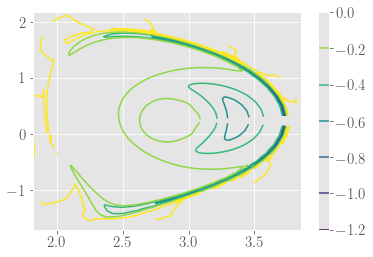

In [20]:
plt.contour(pxr.Xc[:,:,0],pxr.Zc[:,:,0],J3[:,:,0,0])
plt.colorbar()
plt.show()

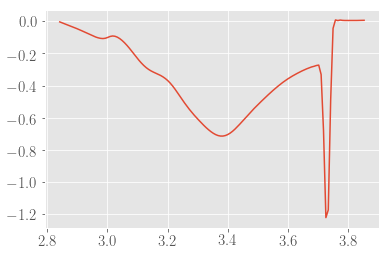

In [27]:
plt.plot(pxr.Xc[:,0,0],J3[:,0,0,1])
plt.show()

In [36]:
J3_avg = np.mean(J3,axis=(1,2))

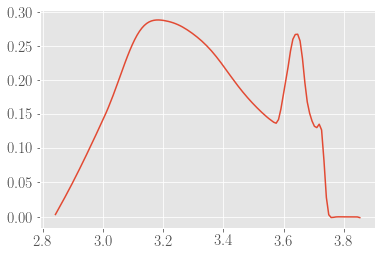

In [39]:
plt.plot(pxr.Xc[:,0,0],-J3_avg[:,0])
plt.show()

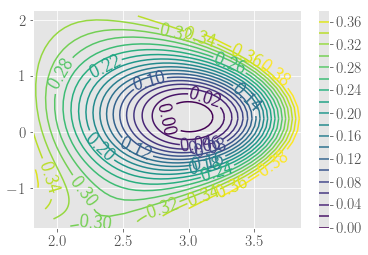

In [10]:
CS = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi_pol[:,:,0,1],20)
plt.clabel(CS,fmt="%1.2f")
plt.colorbar()
plt.show()

In [4]:
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML

## Q-Profile

In [74]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [75]:
q = np.load(filepath+"q_mpi_nm.npy")

In [76]:
time_list = [x for x in range(204)]

In [77]:
psin_list = np.linspace(0.0,1.0,101)

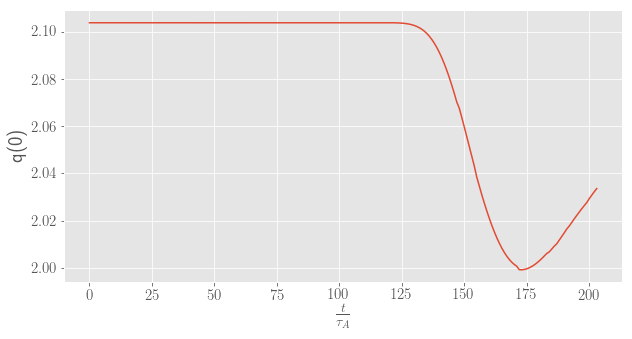

In [78]:
plt.figure(figsize=(10,5))
plt.plot(time_list[0:],q[0,0:])
plt.xlabel(r"$\frac{t}{\tau_A}$")
plt.ylabel("q(0)")
plt.show()

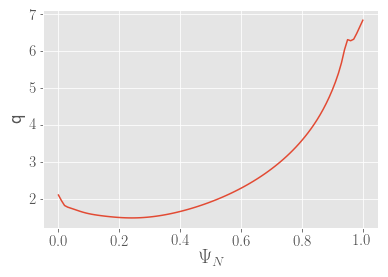

In [79]:
plt.plot(psin_list[:],q[:,0])
#plt.axvline(psin_list[idx32][0],linestyle='dashed')
#plt.axvline(psin_list[idx32][1],linestyle='dashed')
plt.xlabel(r'$\Psi_N$')
plt.ylabel(r'q')
plt.show()

In [80]:
idx32 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./2.)))).flatten()
idx85 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(8./5.)))).flatten()
idx53 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(5./3.)))).flatten()
idx21 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(2./1.)))).flatten()
idx31 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./1.)))).flatten()
idx11 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(1./1.)))).flatten()
idx21 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(2./1.)))).flatten()
idx31 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./1.)))).flatten()
idx41 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(4./1.)))).flatten()
idx51 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(5./1.)))).flatten()
idx12 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(1./2.)))).flatten()
idx22 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(2./2.)))).flatten()
idx32 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./2.)))).flatten()
idx42 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(4./2.)))).flatten()
idx52 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(5./2.)))).flatten()
idx13 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(1./3.)))).flatten()
idx23 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(2./3.)))).flatten()
idx33 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(3./3.)))).flatten()
idx43 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(4./3.)))).flatten()
idx53 = np.argwhere(np.diff(np.sign(np.asarray(q[:,0])-(5./3.)))).flatten()

## $\hat{b}_{nm}$ modes

In [81]:
b_hat_rho = np.load(filepath + "b_hat_rho_mpi_nm.npy")

In [82]:
bnmt = pxr.nm_array(b_hat_rho)

In [83]:
def anim():
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_title(r'(3,2) Double Tearing')
    ax.set_xlabel(r'$\Psi_N$')
    ax.set_ylabel(r'Im($\hat{b}^{\rho}_{m/n}$)')
    ax.plot([],[],'r',label='n=1,m=1')
    ax.plot([],[],'y',label='n=1,m=2')
    ax.plot([],[],'g',label='n=1,m=3')
    ax.plot([],[],'k',label='n=2,m=3')
    ax.plot([],[],'b',label='n=3,m=5')
    ax.plot([],[],'m',label='n=5,m=8')
    #ax.plot([],[],'k',label='n=2,m=3')
    ax.axvline(psin_list[idx21][0],linestyle='dashed',color='y')
    ax.axvline(psin_list[idx32][0],linestyle='dashed',color='k')
    ax.axvline(psin_list[idx32][1],linestyle='dashed',color='k')
    ax.axvline(psin_list[idx31][0],linestyle='dashed',color='g')
    ax.axvline(psin_list[idx53][0],linestyle='dashed',color='b')
    ax.axvline(psin_list[idx53][1],linestyle='dashed',color='b')
    ax.axvline(psin_list[idx85][0],linestyle='dashed',color='m')
    ax.axvline(psin_list[idx85][1],linestyle='dashed',color='m')
    

    ax.legend(loc=4)
    ims = []
    for time_stamp in range(0,204):
        im1, = ax.plot(psin_list[:],np.asarray(bnmt[:,-1,1,time_stamp]).imag,'r')
        im2, = ax.plot(psin_list[:],np.asarray(bnmt[:,-2,1,time_stamp]).imag,'y')
        im3, = ax.plot(psin_list[:],np.asarray(bnmt[:,-3,1,time_stamp]).imag,'g')
        im4, = ax.plot(psin_list[:],np.asarray(bnmt[:,-3,2,time_stamp]).imag,'k')
        im5, = ax.plot(psin_list[:],np.asarray(bnmt[:,-5,3,time_stamp]).imag,'b')
        im6, = ax.plot(psin_list[:],np.asarray(bnmt[:,-8,5,time_stamp]).imag,'m')
        #im7, = ax.plot(psin_list[:],np.asarray(bnmt[:,-3,2,time_stamp]).imag,'k')
        text = 't = '+str(time_stamp)

        an = ax.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        ims.append([im1]+[im2]+[im3]+[im4]+[im5]+[im6]+[an])

    art_ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=100,blit=False)
    return art_ani

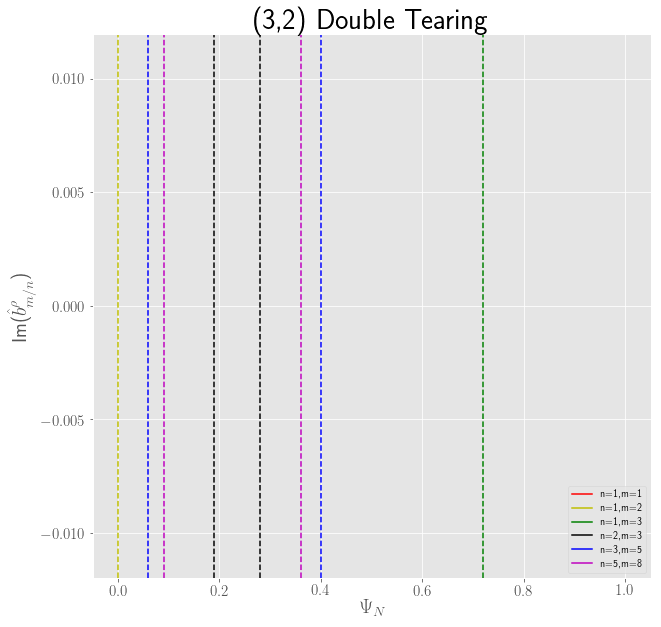

In [84]:
ani = anim()

In [85]:
ani

In [59]:
def anim2():
    fig,ax = plt.subplots(figsize=(10,5))
    ax.set_title(r'(3,2) Double Tearing')
    ax.set_xlabel(r'$\Psi_N$')
    ax.set_ylabel(r'Im($\hat{b}^{\rho}_{m/n}$)')
    ims = []
    for time_stamp in range(0,204):
        im1, = ax.plot(psin_list[:],np.asarray(bnmt[:,1,1,time_stamp]).imag,'r')
        im2, = ax.plot(psin_list[:],np.asarray(bnmt[:,1,3,time_stamp]).imag,'b')
        text = 't = '+str(time_stamp)

        an = ax.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        ims.append([im1]+[im2]+[an])

    art_ani = animation.ArtistAnimation(fig, ims, interval=33, repeat_delay=100,blit=True)
    return art_ani

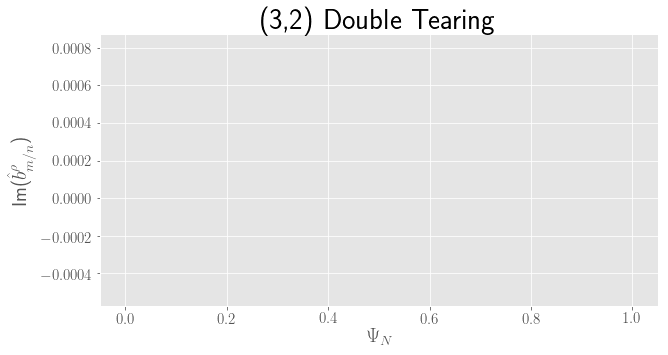

In [60]:
ani2 = anim2()

In [61]:
ani2

## FFT with divergence cleanup

In [86]:
filepath_DF = "/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_tear/dt_sh_m3_n2.scratch/"

In [87]:
b_hat_rho_DF = np.load(filepath + "b_hat_rho_mpi.npy")

In [89]:
bnmt_DF = pxr.nm_array(b_hat_rho_DF)

In [94]:
def anim_DF():
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_title(r'(3,2) Double Tearing')
    ax.set_xlabel(r'$\Psi_N$')
    ax.set_ylabel(r'Im($\hat{b}^{\rho}_{m/n}$)')
    ax.plot([],[],'r',label='n=1,m=1')
    ax.plot([],[],'y',label='n=1,m=2')
    ax.plot([],[],'g',label='n=1,m=3')
    ax.plot([],[],'k',label='n=2,m=3')
    ax.plot([],[],'b',label='n=3,m=5')
    ax.plot([],[],'m',label='n=5,m=8')
    #ax.plot([],[],'k',label='n=2,m=3')
    ax.axvline(psin_list[idx21][0],linestyle='dashed',color='y')
    ax.axvline(psin_list[idx32][0],linestyle='dashed',color='k')
    ax.axvline(psin_list[idx32][1],linestyle='dashed',color='k')
    ax.axvline(psin_list[idx31][0],linestyle='dashed',color='g')
    ax.axvline(psin_list[idx53][0],linestyle='dashed',color='b')
    ax.axvline(psin_list[idx53][1],linestyle='dashed',color='b')
    ax.axvline(psin_list[idx85][0],linestyle='dashed',color='m')
    ax.axvline(psin_list[idx85][1],linestyle='dashed',color='m')
    

    ax.legend(loc=4)
    ims = []
    for time_stamp in range(0,200):
        im1, = ax.plot(psin_list[:],np.asarray(bnmt_DF[:,1,1,time_stamp]).imag,'r')
        im2, = ax.plot(psin_list[:],np.asarray(bnmt_DF[:,2,1,time_stamp]).imag,'y')
        im3, = ax.plot(psin_list[:],np.asarray(bnmt_DF[:,3,1,time_stamp]).imag,'g')
        im4, = ax.plot(psin_list[:],np.asarray(bnmt_DF[:,3,2,time_stamp]).imag,'k')
        im5, = ax.plot(psin_list[:],np.asarray(bnmt_DF[:,5,3,time_stamp]).imag,'b')
        im6, = ax.plot(psin_list[:],np.asarray(bnmt_DF[:,8,5,time_stamp]).imag,'m')
        #im7, = ax.plot(psin_list[:],np.asarray(bnmt[:,-3,2,time_stamp]).imag,'k')
        text = 't = '+str(time_stamp)

        an = ax.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        ims.append([im1]+[im2]+[im3]+[im4]+[im5]+[im6]+[an])

    art_ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=100,blit=False)
    return art_ani

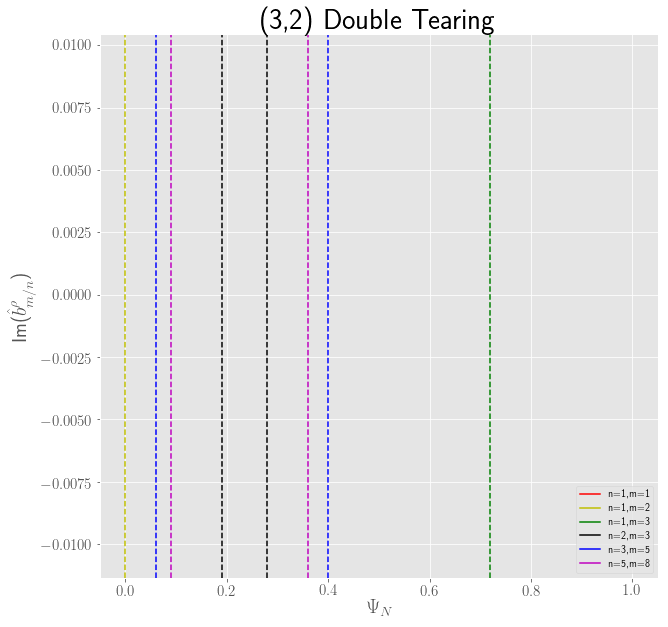

In [95]:
ani_DF = anim_DF();

In [96]:
ani_DF

## Play with fft reconstruction

In [98]:
b_hat_rho.shape

(101, 65, 33, 204)

In [101]:
u_list = np.linspace(0,2*np.pi,65)

In [104]:
phi_list = np.linspace(0,2*np.pi,33)

In [149]:
bpert = b_hat_rho[:,:,:,161]

In [150]:
bhatp = np.fft.fft2(bpert)

In [151]:
bhatp_inv = np.fft.ifft2(bhatp)

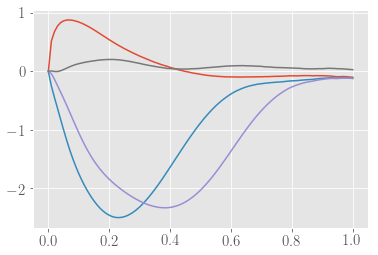

In [194]:
# make sure that fft2 works as intended
plt.plot(psin_list,bhatp[:,-1,1].imag)
plt.plot(psin_list,bhatp[:,-2,1].imag)
plt.plot(psin_list,bhatp[:,-3,1].imag)
plt.plot(psin_list,bhatp[:,-3,2].imag)
plt.show()

In [183]:
# Shift the frequencies so you can throw away the edges
bshift = np.fft.fftshift(bhatp,axes=(1,2))

In [184]:
# truncate the fft by throwing out high frequencies
btrunc = bshift[:,16:-16,8:-8]

In [185]:
# shift the frequencies back so the inverse fft works properly
btrunc_shift = np.fft.ifftshift(btrunc,axes=(1,2))

In [186]:
# Invert the fft to get approximation of original function
btrunc_shift_inv = np.fft.ifft2(btrunc_shift)

In [177]:
btrunc_shift_inv.shape

(101, 33, 17)

In [187]:
# create meshgrid of reduced dimensionality function
u_red_list = np.linspace(0,2*np.pi,33)
phi_red_list = np.linspace(0,2*np.pi,17)

In [188]:
pp,uu = np.meshgrid(psin_list,u_list)
pp_r,uu_r = np.meshgrid(psin_list,u_red_list)

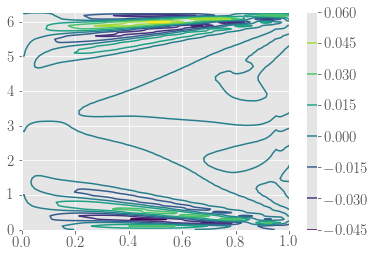

In [189]:
# Snapshot of original function
plt.contour(pp,uu,np.transpose(bpert[:,:,0]))
plt.colorbar()
plt.show()

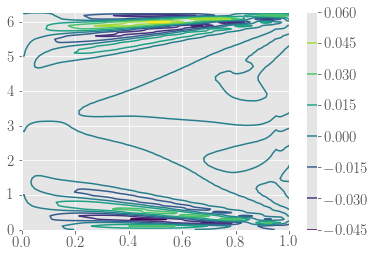

In [196]:
# Snapshot of full inverse fft 
plt.contour(pp,uu,np.transpose(bhatp_inv[:,:,0].real))
plt.colorbar()
plt.show()

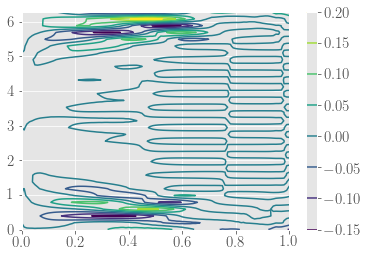

In [193]:
# Snapshot of function created by fewer fft components
plt.contour(pp_r,uu_r,np.transpose(btrunc_shift_inv[:,:,0].real))
plt.colorbar()
plt.show()

## Locate modes for comparison with FFTW

In [198]:
A = np.load("/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_new/dt.scratch/b_hat_rho_mpi_nm.npy")

In [207]:
B = A[:,:,:,109]

In [208]:
C = np.fft.fft2(B)

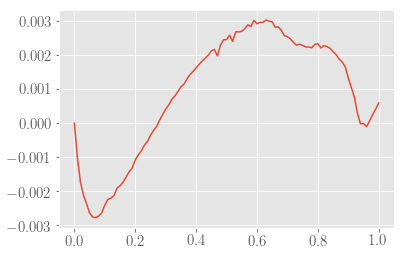

In [219]:
plt.plot(psin_list,C[:,-3,-8].real)
plt.show()

In [7]:
import h5py

In [8]:
f = h5py.File(filepath + "pixie3d.h5",'r')
timesteps = list(f.keys())
    
tstamp_list = []
for ts in timesteps[:-1]: # Sorting timestep list / avoiding Visit expressions
    tstamp = ts.split('_')[1]
    tstamp_list.append(int(tstamp))
timesteps = list(['Timestep_'+str(x) for x in sorted(tstamp_list)])

variables = list(f[timesteps[0]].keys())
car_var = list(f[timesteps[0]][variables[0]].keys())
cnv_var = list(f[timesteps[0]][variables[1]].keys())
cov_var = list(f[timesteps[0]][variables[2]].keys())
diag_var = list(f[timesteps[0]][variables[3]].keys())
pert_var = list(f[timesteps[0]][variables[4]].keys())

In [40]:
cov_var

['B_1',
 'B_2',
 'B_3',
 'J_1',
 'J_2',
 'J_3',
 'T=Te+Ti',
 'V_1',
 'V_2',
 'V_3',
 'rho']

In [11]:
import Te_movie

In [ ]:
ani = Te_movie.main()

--- Logging error ---
Traceback (most recent call last):
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-fc39cfb17543>", line 1, in <module>
    ani = Te_movie.main()
  File "/turquoise/users/giannis_kx/python_pixie/Te_movie.py", line 56, in main
    pxr.pixieload(filepath + "pixie3d.h5")
  File "/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py", line 99, in pixieload
    print("timesteps=",len(timesteps))
OSError: [Errno 5] Input/output error

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0